<a href="https://colab.research.google.com/github/HandsomeJames0223/Deep_Learning/blob/main/cnn_gap(109_10_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
trans = [
         "airplane",
         "automobile",
         "bird",
         "cat",										
         "deer",										
         "dog",									
         "frog",								
         "horse",										
         "ship",										
         "truck"
]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


ans: horse


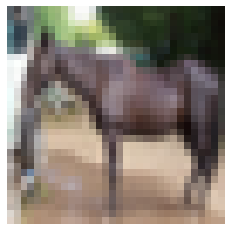

In [ ]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0]-1)
print("ans:", trans[y_train[idx][0]])
plt.axis("off")
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
layers = [Conv2D(64, 3, padding = "same", activation = "relu", input_shape = (32, 32, 3)),
          MaxPooling2D(),
          Conv2D(128, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(256, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(512, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          GlobalAveragePooling2D(),
          Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss = SparseCategoricalCrossentropy(),
              optimizer = Adam(),
              metrics = ["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
450/450 - 7s - loss: 1.5905 - accuracy: 0.4104 - val_loss: 1.3345 - val_accuracy: 0.5274
Epoch 2/50
450/450 - 6s - loss: 1.1261 - accuracy: 0.5969 - val_loss: 0.9865 - val_accuracy: 0.6504
Epoch 3/50
450/450 - 7s - loss: 0.9052 - accuracy: 0.6833 - val_loss: 0.8697 - val_accuracy: 0.6976
Epoch 4/50
450/450 - 6s - loss: 0.7534 - accuracy: 0.7355 - val_loss: 0.7625 - val_accuracy: 0.7342
Epoch 5/50
450/450 - 6s - loss: 0.6347 - accuracy: 0.7801 - val_loss: 0.7040 - val_accuracy: 0.7520
Epoch 6/50
450/450 - 6s - loss: 0.5405 - accuracy: 0.8105 - val_loss: 0.6472 - val_accuracy: 0.7866
Epoch 7/50
450/450 - 6s - loss: 0.4494 - accuracy: 0.8443 - val_loss: 0.6906 - val_accuracy: 0.7726
Epoch 8/50
450/450 - 6s - loss: 0.3687 - accuracy: 0.8734 - val_loss: 0.7033 - val_accuracy: 0.7828
Epoch 9/50
450/450 - 6s - loss: 0.2978 - accuracy: 0.8971 - val_loss: 0.6874 - val_accuracy: 0.7918
Epoch 10/50
450/450 - 6s - loss: 0.2183 - accuracy: 0.9249 - val_loss: 0.7659 - val_accuracy: 0.7830

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6801 - accuracy: 0.7694


[0.6801495552062988, 0.7694000005722046]

In [ ]:
pre = model.predict_classes(x_test_norm)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(10000,)
(10000, 1)
(10000,)


array([5, 8, 8, ..., 5, 4, 7])

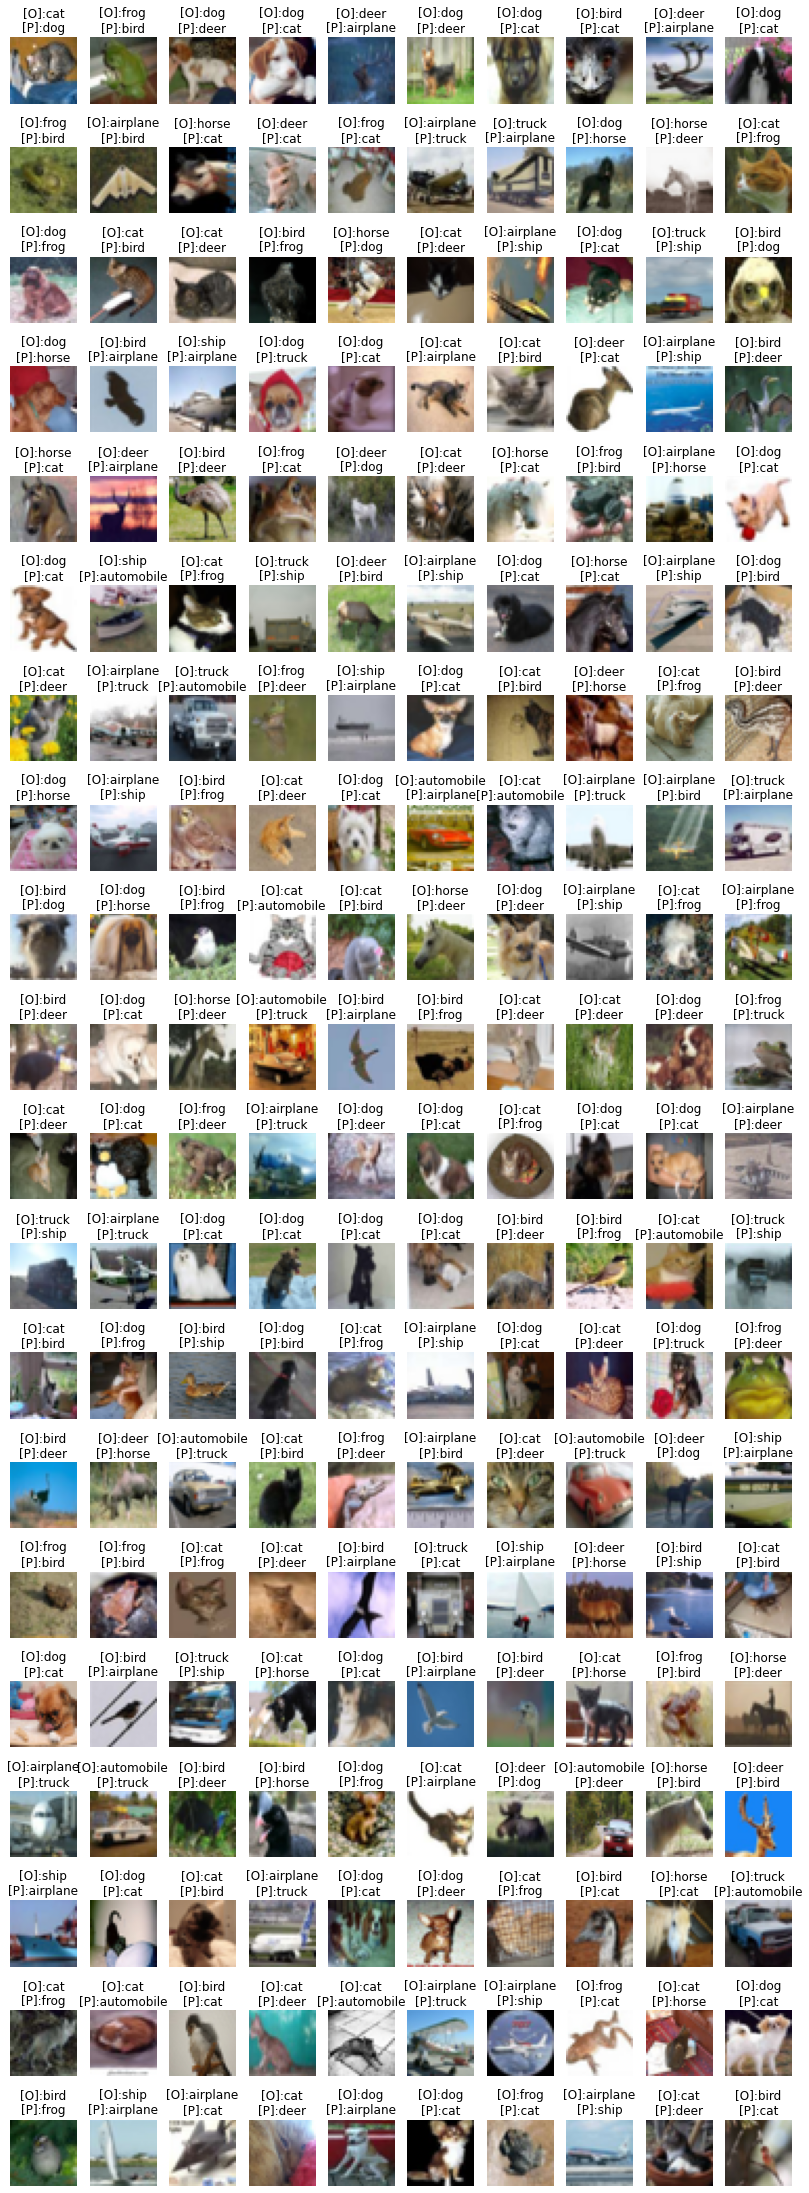

In [ ]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test_r[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# pip install pillow
import PIL
import requests
url = input("輸入網址:")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=h)
img = PIL.Image.open(response.raw).resize((32, 32))
img_np = np.array(img)
test = img_np.reshape(1, 32, 32, 3) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(trans[i], "的機率是:", round(p, 3))
ans = model.predict_classes(test)[0]
print("應該是:", trans[ans])
plt.imshow(img_np)

輸入網址:https://mms.digitimes.com/NewsImg/2018/0810/538450-2-ICDU4.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


UnidentifiedImageError: ignored